In [42]:
import pandas as pd
import matplotlib as plt
plt.rcParams["font.family"] = "Hancom Gothic"
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [43]:
train['date']=pd.to_datetime(train['date'])
train['weekday']=train['date'].dt.weekday #0:월 6:일
train = pd.get_dummies(train,columns=['weekday']) #weekday 변수 생성(원핫인코딩)
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10~11_takeoff,11~12_takeoff,18~20_ride,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,0.0,0.0,5.0,0,0,0,0,0,0,1
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,0.0,0.0,53.0,0,0,0,0,0,0,1
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1


In [44]:
test['date']=pd.to_datetime(test['date'])
test['weekday']=test['date'].dt.weekday
test = pd.get_dummies(test,columns=['weekday'])

In [45]:
train['in_out'].value_counts()

시내    408500
시외      6923
Name: in_out, dtype: int64

In [46]:
train['in_out'] = train['in_out'].map({'시내':0,'시외':1})
test['in_out']=test['in_out'].map({'시내':0,'시외':1})
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10~11_takeoff,11~12_takeoff,18~20_ride,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,2019-09-01,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1
1,1,2019-09-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,4.0,...,0.0,0.0,5.0,0,0,0,0,0,0,1
2,2,2019-09-01,4270000,1,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,0.0,0.0,53.0,0,0,0,0,0,0,1
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1


In [47]:
train.isnull().sum() #결측치 없음

id               0
date             0
bus_route_id     0
in_out           0
station_code     0
station_name     0
latitude         0
longitude        0
6~7_ride         0
7~8_ride         0
8~9_ride         0
9~10_ride        0
10~11_ride       0
11~12_ride       0
6~7_takeoff      0
7~8_takeoff      0
8~9_takeoff      0
9~10_takeoff     0
10~11_takeoff    0
11~12_takeoff    0
18~20_ride       0
weekday_0        0
weekday_1        0
weekday_2        0
weekday_3        0
weekday_4        0
weekday_5        0
weekday_6        0
dtype: int64

<AxesSubplot:ylabel='6~7_ride'>

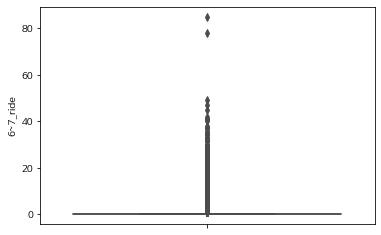

In [48]:
import seaborn as sns
sns.boxplot(data=train, y='6~7_ride', color='red')
#이상치는 중요한 정보이므로 제거하면 안 됨

In [49]:
weather = pd.read_csv('제주도날씨.csv',encoding='euc-kr')
weather=weather.fillna(0) #결측치 0으로 대체하기
#weather_jeju = weather[0:424]
#weather_gosan = weather[424:733]
#weather_sungsan = weather[733:1028]
#weather_seogwipo = weather[1028:1352]
#weather_seogwipo.head()

#weather = pd.get_dummies(weather,columns=['지점명']) #지점명 범주형 변수 생성(원핫인코딩)
weather = weather.drop(['지점','강수량 QC플래그'],axis=1) #지점이랑 QC플래그 쓸데없어 보여서 열 제거했음
weather.rename(columns={'일시':'date'},inplace=True)
weather['date']=pd.to_datetime(weather['date'])
weather['hour']=weather['date'].dt.hour
weather['date']=weather['date'].dt.date
weather.head()

,지점명,date,강수량(mm),hour
0,제주,2019-09-01,0.0,7
1,제주,2019-09-01,0.0,8
2,제주,2019-09-01,0.0,9
3,제주,2019-09-01,0.0,10
4,제주,2019-09-01,0.0,11


In [50]:
weather=weather[(weather['hour']<=12) & (weather['hour']>=6)].reset_index(drop=True) #6시~12시 사이 강수량
weather=weather.groupby('date')['강수량(mm)'].sum().reset_index() #6시~12시 사이의 누적 강수량만을 사용하기 위해
weather

,date,강수량(mm)
0,2019-09-01,0.0
1,2019-09-02,92.5
2,2019-09-03,37.2
3,2019-09-04,133.4
4,2019-09-05,7.2
5,2019-09-06,3.7
6,2019-09-07,1.6
7,2019-09-08,10.0
8,2019-09-09,42.5
9,2019-09-11,6.2


In [51]:
#train['date']=pd.to_datetime(train['date'])
train.date=train.date.astype(str) #train의 date 형식 object로 변경하기(weather의 date 형식과 동일하게해야 merge 가능하니까)
train=pd.merge(train,weather, on='date', how='left') #test도 똑같이 해야 하는데 test 강수량이 없어서 진행 아직 못 함

#train의 행개수랑 weather의 행개수가 다른데 어떻게 병합하냐?
train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,11~12_takeoff,18~20_ride,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,강수량(mm)
0,0,2019-09-01,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,0.0,0,0,0,0,0,0,1,NaN
1,1,2019-09-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,4.0,...,0.0,5.0,0,0,0,0,0,0,1,NaN
2,2,2019-09-01,4270000,1,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,2.0,0,0,0,0,0,0,1,NaN
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,0.0,53.0,0,0,0,0,0,0,1,NaN
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,0,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,NaN
415419,415419,2019-09-30,32820000,0,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,NaN
415420,415420,2019-09-30,32820000,0,2322,해병부대,33.23100,126.26273,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,NaN
415421,415421,2019-09-30,32820000,0,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,NaN


지역 변수 기준

서부(w) : longitude <= 126.35, latitude < 33.5

남부(s) : 126.35 < longitude < 126.725, latitude < 33.32

동부(e) : longitude >= 126.75

북부(n) : 126.35 < longitude < 126.725, latitude > 33.42



In [52]:
region= []

for i in range (len(train)):
    if ((train["longitude"][i] <= 126.35) & (train["latitude"][i] < 33.5)):
        region.append('서')
    elif ((train["longitude"][i] > 126.35) & (train["longitude"][i] < 126.725) & (train["latitude"][i] < 33.32)):
        region.append('남')
    elif ((train["longitude"][i] >= 126.75)):
        region.append('동')
    elif ((train["longitude"][i] > 126.35) & (train["longitude"][i] < 126.725) & (train["latitude"][i] > 33.42)):
        region.append('북')
    else:
        region.append('기타')
        
train["region"]=region

In [53]:
train['bus_route_id'].value_counts()
train['station_code'].value_counts()

358        1610
3270       1535
357        1515
3271       1482
3278       1423
           ... 
3379          1
4239          1
6115009       1
3383          1
3552          1
Name: station_code, Length: 3563, dtype: int64

<AxesSubplot:xlabel='region', ylabel='total'>

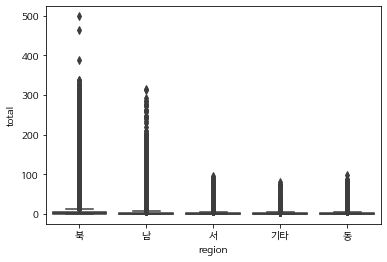

In [59]:
total_ride = train.drop(['id','date','bus_route_id','in_out','station_code','latitude','longitude'
                        ,'6~7_takeoff','7~8_takeoff','8~9_takeoff','9~10_takeoff','10~11_takeoff'
                        ,'11~12_takeoff','station_name','weekday_0','weekday_1','weekday_2','weekday_3'
                        ,'weekday_4','weekday_5','weekday_6','강수량(mm)','region'],axis=1)
total_ride['total'] = total_ride.sum(axis=1)
total_ride['region']=train['region']
total_ride.head()
sns.boxplot(y='total',x='region',data=total_ride)
#북부:제주,남부:서귀포,서부:고산,동부:성산,기타:그 외
#제주 주요 관광지는 통계자료 통해 제주, 서귀포에 많다는 것을 알 수 있음.
#버스 승하차는 출근 뿐만 아니라 관광지 영향도 클 것으로 보임.